In [1]:
import numpy as np # Pour la manipulation de tableaux
from keras.applications import  resnet50
from sklearn import metrics 
import os

import pandas as pd # Pour manipuler des DataFrames pandas

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from keras.models import Sequential # Pour construire un réseau de neurones
from keras.layers import Dense, Conv2D # Pour instancier une couche dense
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model
import cv2
import keras
from numpy.random import seed
import tensorflow

from keras.preprocessing.image import ImageDataGenerator
import itertools # Pour créer des iterateurs

from sklearn import linear_model, preprocessing 



%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam 
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/generateur.csv'


In [3]:

zoom_range = 1.1
horizontal_flip = False
Minimum_Number_Class=100
dropout_rate=0.2
#steps_per_epoch=len(data_train)//batch_size

In [4]:
#df=pd.read_csv("/home/marcpozzo/Desktop/c3po/Images_aquises/generateur.csv")
generateur_path="/home/marcpozzo/Desktop/c3po/Images_aquises/generateur.csv"
df=pd.read_csv(generateur_path)
df.drop('labels',inplace=True,axis=1)
df.head()

,class,img_paths
0,oiseau,Rec_images/DSCF0029_incertain_0.JPG
1,autre,Rec_images/DSCF0029_ground_1.JPG
2,corneille,Rec_images/DSCF0180_corneille_2.JPG
3,corneille,Rec_images/DSCF0180_corneille_3.JPG
4,pigeon,Rec_images/DSCF0258_pigeon_4.JPG


In [5]:
df["class"].unique()
for c in df:
    print(''+c+':',len(df[c].unique()))
df["class"].unique()

class: 12
img_paths: 6220


array(['oiseau', 'autre', 'corneille', 'pigeon', 'pie', 'chat', 'abeille',
       'chevreuil', 'lapin', 'faisan', 'sanglier', 'cheval'], dtype=object)

In [6]:
Minimum_Number_Class=100
All_Unique=df["class"].unique()
Utilisable=[]
for i in df["class"].unique():
    if df["class"][df["class"]==i].count()>Minimum_Number_Class:
        Utilisable.append(i)
Utilisable
Non_Utilisable=set(All_Unique)-set(Utilisable)
Non_Utilisable
for i in Non_Utilisable:
    df=df[df["class"]!=i]
df=df[df["class"]!="oiseau"]  
df["class"].unique()

array(['autre', 'corneille', 'pigeon', 'chevreuil', 'lapin', 'faisan'],
      dtype=object)

In [7]:

for i in range(len(df["class"])):
    image_name=df["img_paths"].iloc[i]
    df["img_paths"].iloc[i]=os.path.join(base_img_paths,image_name)
    
df.head()

,class,img_paths
1,autre,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...
2,corneille,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...
3,corneille,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...
4,pigeon,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...
5,autre,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...


In [8]:
seed(1)
tensorflow.random.set_seed(2)
test_size=0.2

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=test_size,random_state=42)
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        #rotation_range = 10,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)






In [20]:
zoom_range=1

Epoch_Size_list=[10,50,100,200,400,600,800,1000]

Ep_len=len( Epoch_Size_list)
j=1
epochs=200
val_acc_liste=[]

print(zoom_range,"zoom_range")
print(Minimum_Number_Class,"Minimum_Number_Class")
print(dropout_rate,"dropout_rate" )

for batch_size in Epoch_Size_list:
    print(batch_size,"batch_size" )

Found 4773 validated image filenames belonging to 6 classes.
Found 1194 validated image filenames belonging to 6 classes.
Epoch 1/100
7/7 [==============================] - 5s 706ms/step - loss: 7.2115 - accuracy: 0.3790 - val_loss: 2.1415 - val_accuracy: 0.4250
Epoch 2/100
7/7 [==============================] - 4s 629ms/step - loss: 1.8861 - accuracy: 0.4855 - val_loss: 1.6078 - val_accuracy: 0.5657
Epoch 3/100
7/7 [==============================] - 4s 643ms/step - loss: 1.5488 - accuracy: 0.5615 - val_loss: 1.3204 - val_accuracy: 0.6133
Epoch 4/100
7/7 [==============================] - 4s 611ms/step - loss: 1.2895 - accuracy: 0.6048 - val_loss: 1.1658 - val_accuracy: 0.6414
Epoch 5/100
7/7 [==============================] - 4s 623ms/step - loss: 1.1609 - accuracy: 0.6420 - val_loss: 1.0581 - val_accuracy: 0.6917
Epoch 6/100
7/7 [==============================] - 4s 635ms/step - loss: 1.1574 - accuracy: 0.6401 - val_loss: 0.9994 - val_accuracy: 0.6919
Epoch 7/100
7/7 [===============

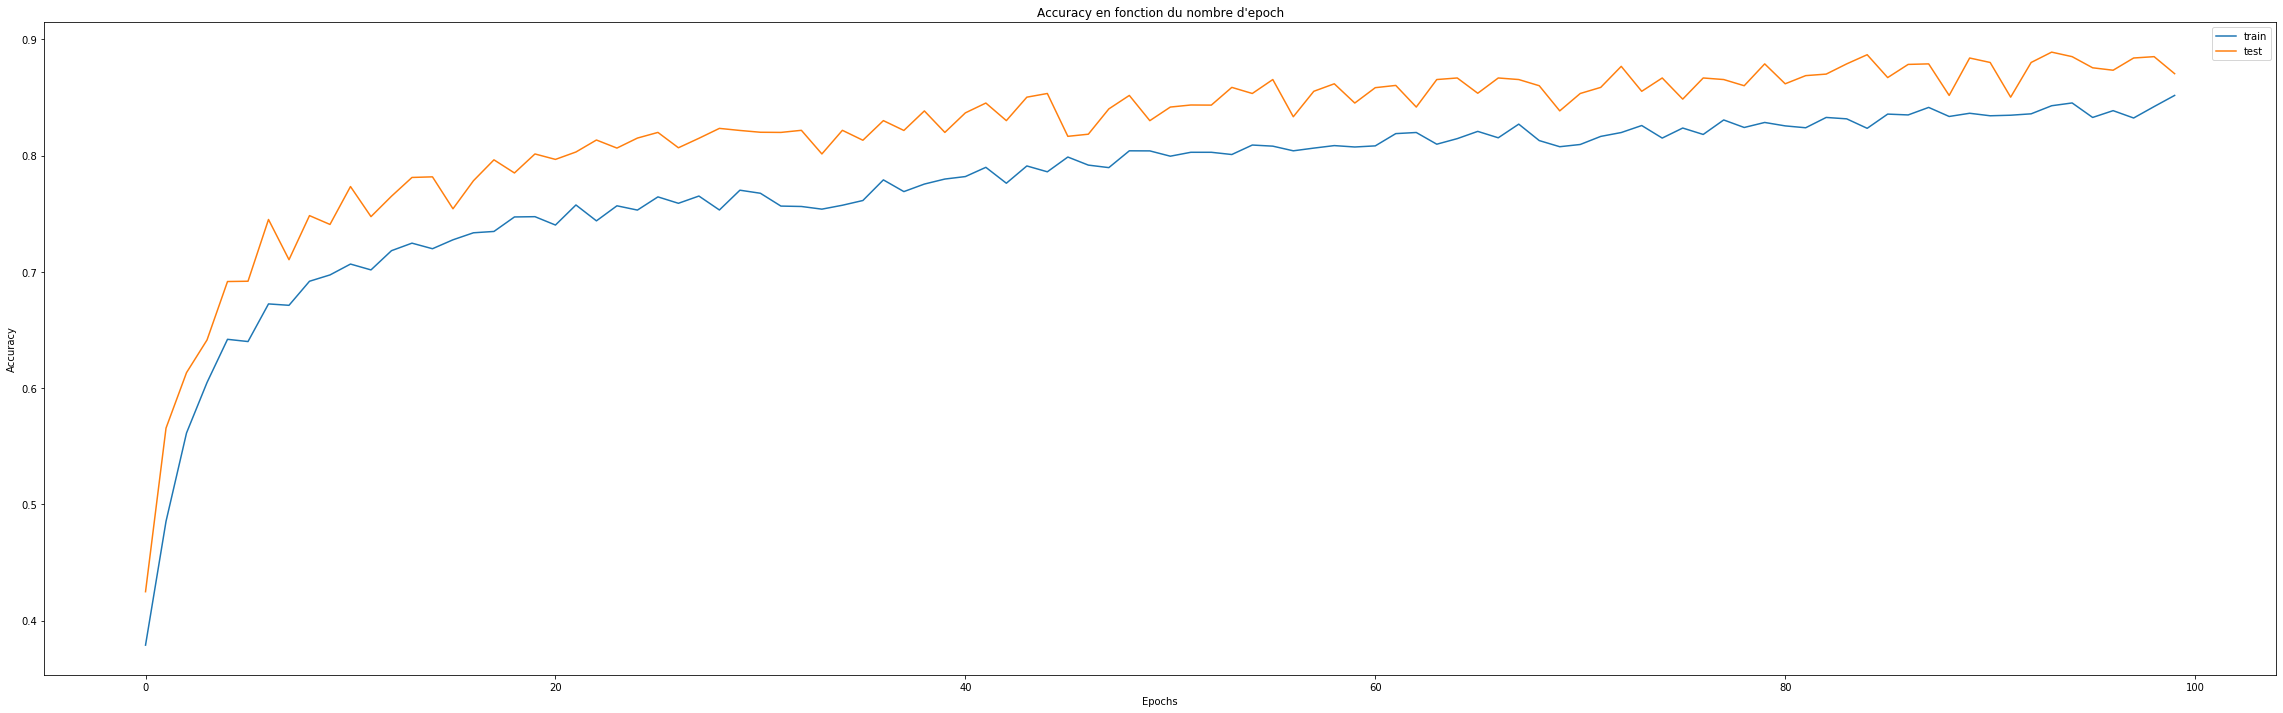

In [12]:
    Epoch_Size=600
    batch_size=600
    epochs=100
    train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)
    test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


    
    
    lenet = Sequential()

    conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

    max_pool_1 = MaxPooling2D(pool_size = (2, 2))

    conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

    max_pool_2 = MaxPooling2D(pool_size = (2, 2))

    flatten = Flatten()

    dropout = Dropout(rate = dropout_rate)

    dense_1 = Dense(units = 128,
                activation = 'relu')

    dense_2 = Dense(units = 6,
                activation = 'softmax')

    lenet.add(conv_1)
    lenet.add(max_pool_1)
    lenet.add(conv_2)
    lenet.add(max_pool_2)
    lenet.add(dropout)
    lenet.add(flatten)
    lenet.add(dense_1)
    lenet.add(dense_2)



    
    
    
    lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation
    
    history=lenet.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)
                          
    #val_acc_liste.append(history.history['val_accuracy'][-1])

    plt.figure(figsize=(40,12))
    plt.subplot(1,1,1)
    
    plt.plot(history.history['accuracy'],label="train");
    plt.plot(history.history['val_accuracy'],label="test");
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title("Accuracy en fonction du nombre d'epoch");
    plt.legend();
    
    
    
    
#print("pour chaque taille de batch l'accuracy de l'echantillon de validation est : ",val_acc_liste)

In [13]:
def convert_image(X):
    X_img=[]
    for image in X:
        # Load image
        img=cv2.imread(image)
        # Resize image
        img=cv2.resize(img,(28,28))
        # for the black and white image
        if img.shape==(28, 28):
            img=img.reshape([28,28,1])
            img=np.concatenate([img,img,img],axis=2)
        # cv2 load the image BGR sequence color (not RGB)
        X_img.append(img[...,::-1])
    return np.array(X_img)

# Load the images train
X_train_img = convert_image(data_train.img_paths)
Y_train = data_train['class']

# Load the images test
X_test_img = convert_image(data_test.img_paths)
Y_test = data_test['class']

In [14]:
from keras.models import load_model
#model = load_model('model.h6')
model=lenet
intermediate_layer_model = Model(input=model.input, output=model.layers[-1].output)
X_test_features = intermediate_layer_model.predict(preprocess_input(X_test_img))
arg_predict=X_test_features.argmax(axis=1)
arg_predict

/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


array([0, 0, 0, ..., 2, 2, 3])

In [105]:
#On va essayer de faire un point sur les différentes techniques de prédictions generator, classes ...). En le comparant bien sur avec le Y_test
X_train_img.shape

(4773, 28, 28, 3)

In [27]:

pd.crosstab(Y_test,arg_predict)


#print(metrics.classification_report(Y_test, Values))

col_0,0,1,2,3,4,5
class,,,,,,
autre,664,0,10,4,0,6
chevreuil,12,14,0,1,0,0
corneille,17,1,184,2,2,9
faisan,18,0,7,40,1,1
lapin,19,0,9,1,6,0
pigeon,21,1,6,0,0,138


In [95]:
pred_class=lenet.predict_classes(X_test_img)
pd.crosstab(pred_class,Y_test)

class,autre,chevreuil,corneille,faisan,lapin,pigeon
row_0,,,,,,
0,677,19,104,66,34,163
1,2,0,17,1,0,2
2,3,0,91,0,0,1
3,1,1,0,0,1,0
4,0,0,1,0,0,0
5,1,7,2,0,0,0


In [94]:
pred_gen=lenet.predict_generator(test_generator)
pred_gen=pred_class.argmax(axis=1)
pd.crosstab(pred_gen,Y_test)

class,autre,chevreuil,corneille,faisan,lapin,pigeon
row_0,,,,,,
0,436,18,138,39,23,101
1,10,0,2,0,0,4
2,132,4,35,11,5,26
3,28,1,7,6,1,7
4,2,1,0,2,1,2
5,76,3,33,9,5,26


In [39]:
pd.crosstab(pred_gen,arg_predict,margins=True)

col_0,0,1,2,3,4,5,All
row_0,,,,,,,
0,488,8,135,28,6,90,755
1,10,0,2,0,0,4,16
2,135,5,36,10,2,25,213
3,31,1,7,3,0,8,50
4,4,0,1,2,0,1,8
5,83,2,35,5,1,26,152
All,751,16,216,48,9,154,1194


In [61]:
dictionnaire=train_generator.class_indices
dictionnaire

dictionnaire_inv = {v: k for k, v in dictionnaire.items()}
dictionnaire_inv

Keys=[]
Values=[]

for i in range(len(arg_predict)) :
    Keys.append(arg_predict[i])
    Values.append(dictionnaire_inv[arg_predict[i]])

print(metrics.classification_report(list(Y_test), Values))
#type(list(Y_test))

{0: 'autre',
 1: 'chevreuil',
 2: 'corneille',
 3: 'faisan',
 4: 'lapin',
 5: 'pigeon'}

In [103]:
#Faire fonction en fonction du dic event et du predict
from sklearn import metrics 
def metrique(arg_predict):
    dictionnaire=train_generator.class_indices
    dictionnaire_inv = {v: k for k, v in dictionnaire.items()}
    
    Keys=[]
    Values=[]

    for i in range(len(arg_predict)) :
        Keys.append(arg_predict[i])
        Values.append(dictionnaire_inv[arg_predict[i]])

    #print(metrics.classification_report(Y_test, Values))
    return Values

pred=metrique(arg_predict)

print(metrics.classification_report(Y_test,pred))
#Y_test.values.shape

              precision    recall  f1-score   support

       autre       0.88      0.97      0.93       684
   chevreuil       0.88      0.52      0.65        27
   corneille       0.85      0.86      0.85       215
      faisan       0.83      0.60      0.70        67
       lapin       0.67      0.17      0.27        35
      pigeon       0.90      0.83      0.86       166

    accuracy                           0.88      1194
   macro avg       0.83      0.66      0.71      1194
weighted avg       0.87      0.88      0.87      1194



In [102]:
pred=metrique(pred_gen)
print(metrics.classification_report(Y_test, pred))

              precision    recall  f1-score   support

       autre       0.58      0.64      0.61       684
   chevreuil       0.00      0.00      0.00        27
   corneille       0.16      0.16      0.16       215
      faisan       0.12      0.09      0.10        67
       lapin       0.12      0.03      0.05        35
      pigeon       0.17      0.16      0.16       166

    accuracy                           0.42      1194
   macro avg       0.19      0.18      0.18      1194
weighted avg       0.39      0.42      0.41      1194



In [101]:
pred=metrique(pred_class)
print(metrics.classification_report(Y_test, pred))

              precision    recall  f1-score   support

       autre       0.64      0.99      0.78       684
   chevreuil       0.00      0.00      0.00        27
   corneille       0.96      0.42      0.59       215
      faisan       0.00      0.00      0.00        67
       lapin       0.00      0.00      0.00        35
      pigeon       0.00      0.00      0.00       166

    accuracy                           0.64      1194
   macro avg       0.27      0.24      0.23      1194
weighted avg       0.54      0.64      0.55      1194

